In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
#import seaborn as sns; sns.set()
from openpyxl import load_workbook

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

#this will mute errors that make your final pdf less legible
import warnings
warnings.filterwarnings('ignore')

filename="/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Assistance_program_analysis/DTA_ZIPCODE_Report_DEC_2022.v2.xlsx"
zip_data_filename="/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Boston_Zip_codes_community_map.xlsx"

In [ ]:
df = pd.read_excel(filename, 'Dashboard', skiprows = 2, nrows=5,  usecols= 'P:V')
df=df.fillna(method='ffill')
print (df)

   Unnamed: 15  ACTIVE Unnamed: 17  CLOSED Unnamed: 19  Total  CASES  \
0    AU_PGM_CD   CASES     CLIENTS   CASES     CLIENTS           NaN   
1         SNAP  628173     1036726   13738       26157      641911.0   
2        TAFDC   37006       96846     707        2809       37713.0   
3        EAEDC   25652       25739     753         853       26405.0   
4  Grand Total  690831     1159311   15198       29819      706029.0   

   Total  CLIENTS  
0             NaN  
1       1062883.0  
2         99655.0  
3         26592.0  
4       1189130.0  


       Active Cases  Active Clients
SNAP         628173         1036726
TAFDC         37006           96846
EAEDC         25652           25739


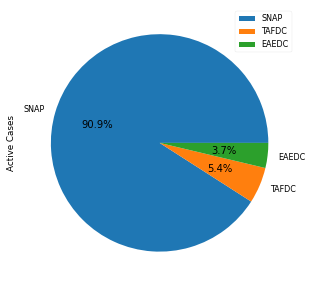

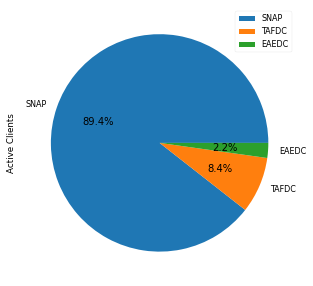

In [ ]:
df3 = pd.DataFrame({'Active Cases':[df['ACTIVE'][1],df['ACTIVE'][2],df['ACTIVE'][3]],'Active Clients':[df['Unnamed: 17'][1],df['Unnamed: 17'][2],df['Unnamed: 17'][3]]}, index=['SNAP','TAFDC','EAEDC'])
print(df3)
plot = df3.plot.pie(y='Active Cases', figsize=(5, 5),autopct='%1.1f%%')
plot = df3.plot.pie(y='Active Clients', figsize=(5, 5),autopct='%1.1f%%')

       Closed Cases  Closed Clients
SNAP          13738           26157
TAFDC           707            2809
EAEDC           753             853


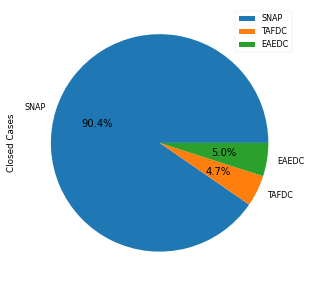

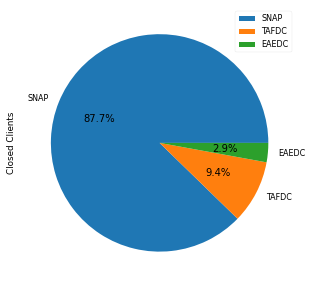

In [ ]:
df3 = pd.DataFrame({'Closed Cases':[df['CLOSED'][1],df['CLOSED'][2],df['CLOSED'][3]],'Closed Clients':[df['Unnamed: 19'][1],df['Unnamed: 19'][2],df['Unnamed: 19'][3]]}, index=['SNAP','TAFDC','EAEDC'])
print(df3)
plot = df3.plot.pie(y='Closed Cases', figsize=(5, 5),autopct='%1.1f%%')
plot = df3.plot.pie(y='Closed Clients', figsize=(5, 5),autopct='%1.1f%%')

       Total Cases
SNAP      641911.0
TAFDC      37713.0
EAEDC      26405.0


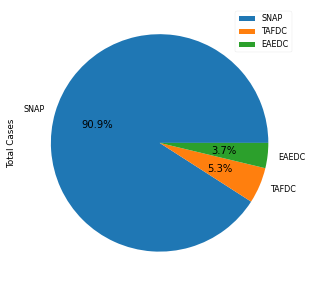

In [ ]:
df3 = pd.DataFrame({'Total Cases':[df['Total  CASES'][1],df['Total  CASES'][2],df['Total  CASES'][3]]}, index=['SNAP','TAFDC','EAEDC'])
print(df3)
plot = df3.plot.pie(y='Total Cases', figsize=(5, 5),autopct='%1.1f%%')

In [ ]:
wb = load_workbook("/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Assistance_program_analysis/DTA_ZIPCODE_Report_DEC_2022.v2.xlsx")

In [ ]:
# ws = wb["Dashboard"]
ws = wb["Cases & Clients by ZIP Code"]
# check what tables that exist in the worksheet
print({key : value for key, value in ws.tables.items()})

{}


In [ ]:
# ws = wb["Dashboard"]
ws = wb["Reported Month Caseload Data "]
# check what tables that exist in the worksheet
print({key : value for key, value in ws.tables.items()})

{'Table_1': 'A1:H2710'}


In [ ]:
df = pd.read_excel(filename, 'Reported Month Caseload Data ', usecols= 'A:H',dtype={'ZIP_CODE': object})
df=df.dropna(subset=['CASES','CLIENTS'])
df

CYCLE_MONTH AU_PGM_CD              CITY MEMB_STAT_CD ZIP_CODE     COUNTY  \
0     2022-12-01     EAEDC          ABINGTON       ACTIVE    02351   PLYMOUTH   
2     2022-12-01     EAEDC             ACTON       ACTIVE    01720  MIDDLESEX   
3     2022-12-01     EAEDC          ACUSHNET       ACTIVE    02743    BRISTOL   
4     2022-12-01     EAEDC             ADAMS       ACTIVE    01220  BERKSHIRE   
5     2022-12-01     EAEDC            AGAWAM       ACTIVE    01001    HAMPDEN   
...          ...       ...               ...          ...      ...        ...   
2681  2022-12-01     TAFDC           WEBSTER       CLOSED    01570  WORCESTER   
2684  2022-12-01     TAFDC  WEST SPRINGFIELD       CLOSED    01089    HAMPDEN   
2701  2022-12-01     TAFDC         WORCESTER       CLOSED    01604  WORCESTER   
2702  2022-12-01     TAFDC         WORCESTER       CLOSED    01605  WORCESTER   
2707  2022-12-01     TAFDC         WORCESTER       CLOSED    01610  WORCESTER   

      CASES  CLIENTS  
0      26.0     26.0  
2      93.0     93.0  
3      24.0     26.0  
4      32.0     32.0  
5      46.0     46.0  
...     ...      ...  
2681   13.0     31.0  
2684   17.0     57.0  
2701   16.0     53.0  
2702   21.0     64.0  
2707   14.0     38.0  

[1426 rows x 8 columns]

In [ ]:
df=df.loc[df['CITY'] == 'BOSTON']
df_snap=df.loc[df['AU_PGM_CD']=='SNAP']
df_snap=df_snap.sort_values(by=['CASES'],ascending=False)
df_snap.head()

CYCLE_MONTH AU_PGM_CD    CITY MEMB_STAT_CD ZIP_CODE   COUNTY    CASES  \
889  2022-12-01      SNAP  BOSTON       ACTIVE    02124  SUFFOLK  11001.0   
886  2022-12-01      SNAP  BOSTON       ACTIVE    02121  SUFFOLK   8090.0   
884  2022-12-01      SNAP  BOSTON       ACTIVE    02119  SUFFOLK   7824.0   
890  2022-12-01      SNAP  BOSTON       ACTIVE    02125  SUFFOLK   6494.0   
900  2022-12-01      SNAP  BOSTON       ACTIVE    02136  SUFFOLK   5731.0   

     CLIENTS  
889  18760.0  
886  14227.0  
884  12324.0  
890  10714.0  
900   9408.0

In [ ]:
# load the data
df_zip = pd.read_excel('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Boston_Zip_codes_community_map.xlsx', sheet_name='Sheet2',usecols= 'A:E',dtype={'ZIPCODES': object})
df_zip.rename(columns={'ZIPCODES':'ZIP_CODE'}, inplace=True)
df_zip

ZIP_CODE                                     Community     Lat    Long  \
0     02101                               Downtown Boston  42.357 -71.064   
1     02108                                   Beacon Hill  42.358 -71.064   
2     02109                        Markets / Inner Harbor  42.363 -71.054   
3     02110                  Financial District / Wharves  42.359 -71.054   
4     02111  Chinatown / Tufts-New England Medical Center  42.351 -71.061   
5     02112                               Downtown Boston  42.359 -71.057   
6     02113                                     North End  42.365 -71.055   
7     02114                   West End / Back of the Hill  42.363 -71.066   
8     02115                 Fenway / East Fens / Longwood  42.340 -71.100   
9     02116                                      Back Bay  42.350 -71.080   
10    02117                               Downtown Boston  42.359 -71.057   
11    02118                                     South End  42.340 -71.070   
12    02119                                       Roxbury  42.320 -71.080   
13    02120                              Roxbury Crossing  42.330 -71.100   
14    02121                          Roxbury / Grove Hall  42.310 -71.080   
15    02122                    Dorchester / Fields Corner  42.290 -71.050   
16    02123                               Downtown Boston  42.359 -71.057   
17    02124                    Dorchester / Codman Square  42.290 -71.070   
18    02125                    Dorchester / Uphams Corner  42.320 -71.000   
19    02126                                      Mattapan  42.280 -71.090   
20    02127                                  South Boston  42.330 -71.040   
21    02128                                   East Boston  42.370 -71.020   
22    02129                                   Charlestown  42.380 -71.060   
23    02130                                 Jamaica Plain  42.310 -71.120   
24    02131                                    Roslindale  42.280 -71.120   
25    02132                                  West Roxbury  42.280 -71.160   
26    02133                               Downtown Boston  42.359 -71.057   
27    02134                                       Allston  42.360 -71.130   
28    02135                                      Brighton  42.350 -71.150   
29    02136                                     Hyde Park  42.250 -71.130   
30    02137                                     Readville  42.240 -71.138   
31    02138                                     Cambridge  42.380 -71.130   
32    02139                                     Cambridge  42.360 -71.100   
33    02140                                     Cambridge  42.390 -71.130   
34    02141                                     Cambridge  42.370 -71.080   
35    02142                                     Cambridge  42.360 -71.080   
36    02143                                    Somerville  42.380 -71.100   
37    02144                                    Somerville  42.400 -71.120   
38    02145                                    Somerville  42.390 -71.090   
39    02163                    North Brighton / Cambridge  42.369 -71.125   
40    02196                               Downtown Boston  42.359 -71.057   
41    02199                                    Prudential  42.347 -71.083   
42    02201                               Downtown Boston  42.360 -71.058   
43    02205                               Downtown Boston  42.359 -71.057   
44    02210                     South Boston / Fort Point  42.350 -71.040   
45    02215                   Kenmore / Boston University  42.340 -71.100   
46    02216                               Downtown Boston  42.370 -71.050   
47    02228                                   East Boston  42.378 -71.029   
48    02238                                     Cambridge  42.360 -71.100   
49    02445                                     Brookline  42.320 -71.130   
50    02446                                     Brookline  42.340 -71.120   

In [ ]:
df = df[df.columns.drop(list(df.filter(regex='Margin of Error')))]

In [ ]:
df.head()

CYCLE_MONTH AU_PGM_CD    CITY MEMB_STAT_CD ZIP_CODE   COUNTY  CASES  \
46  2022-12-01     EAEDC  BOSTON       ACTIVE    02108  SUFFOLK   15.0   
49  2022-12-01     EAEDC  BOSTON       ACTIVE    02111  SUFFOLK   62.0   
51  2022-12-01     EAEDC  BOSTON       ACTIVE    02114  SUFFOLK   71.0   
52  2022-12-01     EAEDC  BOSTON       ACTIVE    02115  SUFFOLK  174.0   
53  2022-12-01     EAEDC  BOSTON       ACTIVE    02116  SUFFOLK  126.0   

    CLIENTS  
46     15.0  
49     62.0  
51     71.0  
52    175.0  
53    126.0

In [ ]:
df_union=pd.merge(df, df_zip, on='ZIP_CODE', how='outer')
df_union

CYCLE_MONTH AU_PGM_CD    CITY MEMB_STAT_CD ZIP_CODE   COUNTY   CASES  \
0    2022-12-01     EAEDC  BOSTON       ACTIVE    02108  SUFFOLK    15.0   
1    2022-12-01      SNAP  BOSTON       ACTIVE    02108  SUFFOLK   222.0   
2    2022-12-01     EAEDC  BOSTON       ACTIVE    02111  SUFFOLK    62.0   
3    2022-12-01      SNAP  BOSTON       ACTIVE    02111  SUFFOLK  1302.0   
4    2022-12-01      SNAP  BOSTON       CLOSED    02111  SUFFOLK    22.0   
..          ...       ...     ...          ...      ...      ...     ...   
123         NaT       NaN     NaN          NaN    02228      NaN     NaN   
124         NaT       NaN     NaN          NaN    02238      NaN     NaN   
125         NaT       NaN     NaN          NaN    02445      NaN     NaN   
126         NaT       NaN     NaN          NaN    02446      NaN     NaN   
127         NaT       NaN     NaN          NaN    02447      NaN     NaN   

     CLIENTS                                     Community     Lat    Long  \
0       15.0                                   Beacon Hill  42.358 -71.064   
1      224.0                                   Beacon Hill  42.358 -71.064   
2       62.0  Chinatown / Tufts-New England Medical Center  42.351 -71.061   
3     1958.0  Chinatown / Tufts-New England Medical Center  42.351 -71.061   
4       32.0  Chinatown / Tufts-New England Medical Center  42.351 -71.061   
..       ...                                           ...     ...     ...   
123      NaN                                   East Boston  42.378 -71.029   
124      NaN                                     Cambridge  42.360 -71.100   
125      NaN                                     Brookline  42.320 -71.130   
126      NaN                                     Brookline  42.340 -71.120   
127      NaN                             Brookline Village  42.333 -71.117   

                                     Neighborhood  
0                                     Beacon Hill  
1                                     Beacon Hill  
2    Chinatown / Tufts-New England Medical Center  
3    Chinatown / Tufts-New England Medical Center  
4    Chinatown / Tufts-New England Medical Center  
..                                            ...  
123                       Maverick Sq|East Boston  
124                             Neighborhood Four  
125                                Norfolk County  
126                                North Brookine  
127                                     Brookline  

[128 rows x 12 columns]

In [ ]:
df_snap=df_union.loc[df_union['AU_PGM_CD']=='SNAP']
df_snap=df_snap.sort_values(by=['CASES'],ascending=False)
df_snap.head()

CYCLE_MONTH AU_PGM_CD    CITY MEMB_STAT_CD ZIP_CODE   COUNTY    CASES  \
45  2022-12-01      SNAP  BOSTON       ACTIVE    02124  SUFFOLK  11001.0   
34  2022-12-01      SNAP  BOSTON       ACTIVE    02121  SUFFOLK   8090.0   
24  2022-12-01      SNAP  BOSTON       ACTIVE    02119  SUFFOLK   7824.0   
50  2022-12-01      SNAP  BOSTON       ACTIVE    02125  SUFFOLK   6494.0   
93  2022-12-01      SNAP  BOSTON       ACTIVE    02136  SUFFOLK   5731.0   

    CLIENTS                   Community    Lat   Long  \
45  18760.0  Dorchester / Codman Square  42.29 -71.07   
34  14227.0        Roxbury / Grove Hall  42.31 -71.08   
24  12324.0                     Roxbury  42.32 -71.08   
50  10714.0  Dorchester / Uphams Corner  42.32 -71.00   
93   9408.0                   Hyde Park  42.25 -71.13   

                    Neighborhood  
45          Codman Sq|Dorchester  
34  Franklin Field North|Roxbury  
24       Washington Park|Roxbury  
50                Harbor Islands  
93         Stony Brook|Hyde Park

In [ ]:
import pandas as pd
import numpy as np
from folium import plugins, Map
from folium.plugins import HeatMap


base_map = Map(location = [42.360, -71.130], zoom_start = 10)

df_snap['Lat'] = df_snap['Lat'].astype(float)
df_snap['Long'] = df_snap['Long'].astype(float)
df_snap['CASES'] = df_snap['CASES'].astype(float)
heat_data = list(map(list, zip(df_snap["Lat"],df_snap["Long"],df_snap["CASES"])))

HeatMap(heat_data).add_to(base_map)
base_map.save(r"/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/folium_map.html")


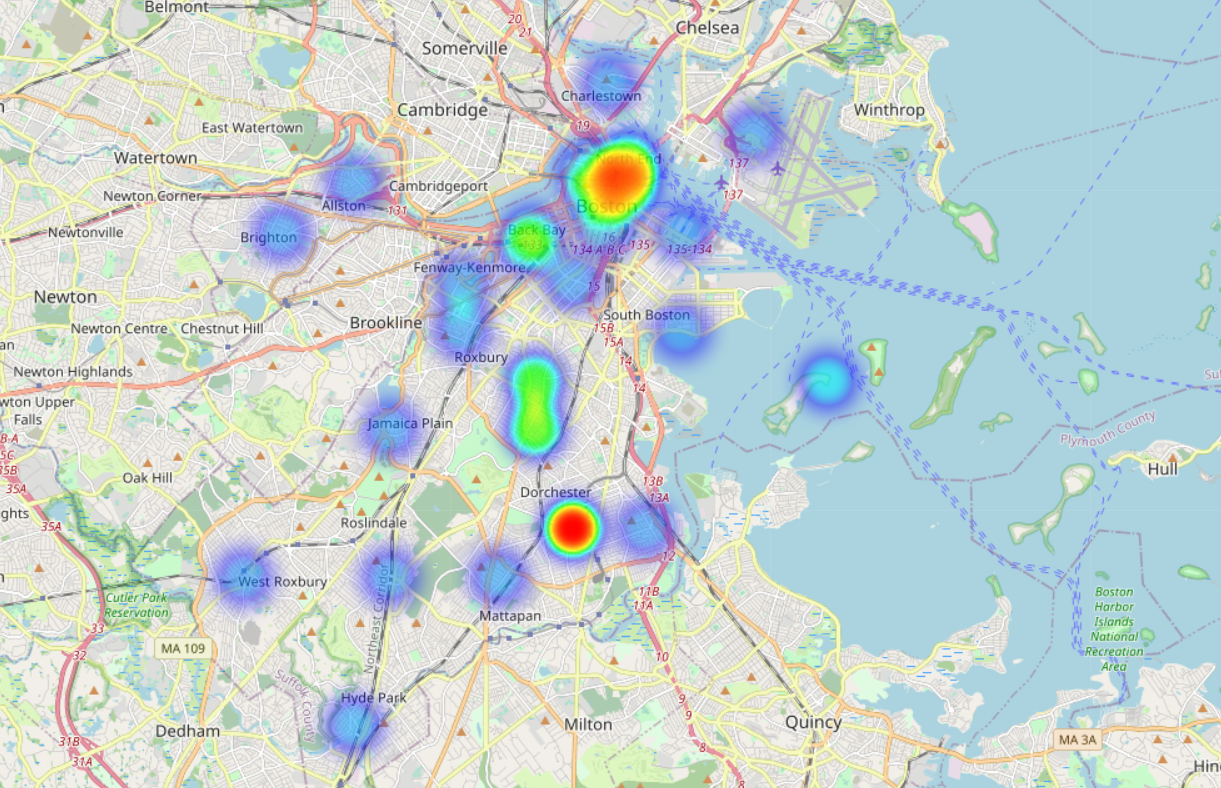

In [ ]:
df_tafdc=df_union.loc[df_union['AU_PGM_CD']=='TAFDC']
df_tafdc=df_tafdc.sort_values(by=['CASES'],ascending=False)
df_tafdc.head()
import pandas as pd
import numpy as np
from folium import plugins, Map
from folium.plugins import HeatMap


base_map = Map(location = [42.360, -71.130], zoom_start = 10)

df_tafdc['Lat'] = df_tafdc['Lat'].astype(float)
df_tafdc['Long'] = df_tafdc['Long'].astype(float)
df_tafdc['CASES'] = df_tafdc['CASES'].astype(float)
heat_data = list(map(list, zip(df_tafdc["Lat"],df_tafdc["Long"],df_tafdc["CASES"])))

HeatMap(heat_data).add_to(base_map)
base_map.save(r"/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/folium_map_tafdc.html")


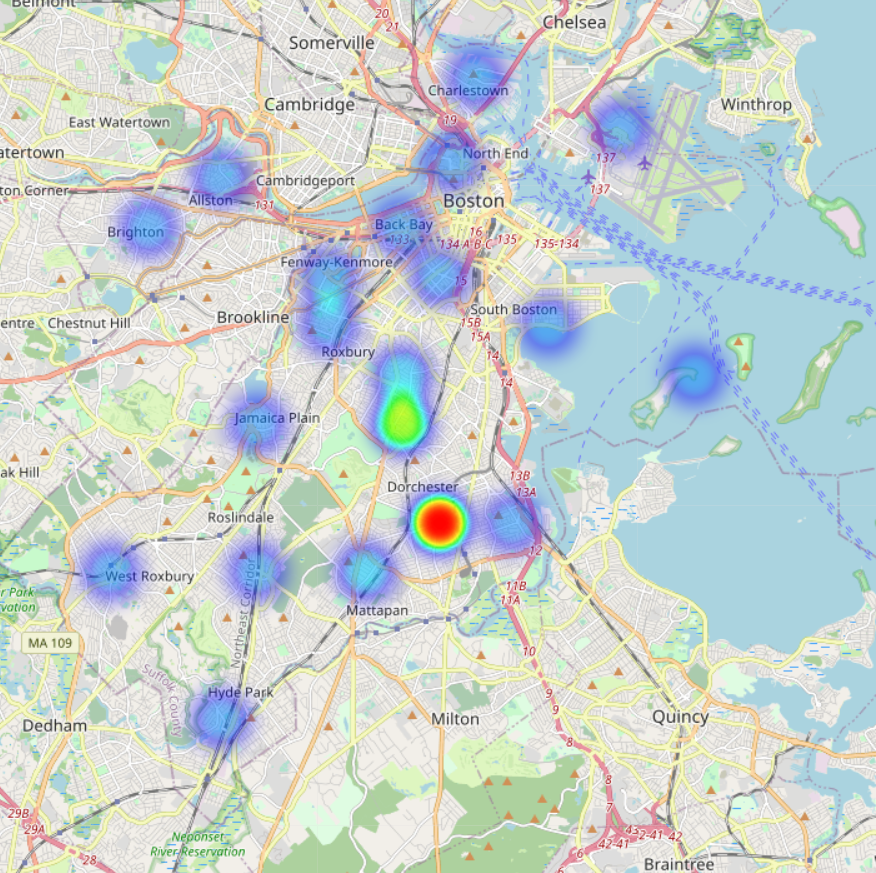

In [ ]:
df_eaedc=df_union.loc[df_union['AU_PGM_CD']=='EAEDC']
df_eaedc=df_eaedc.sort_values(by=['CASES'],ascending=False)
df_eaedc.head()
import pandas as pd
import numpy as np
from folium import plugins, Map
from folium.plugins import HeatMap


base_map = Map(location = [42.360, -71.130], zoom_start = 10)

df_eaedc['Lat'] = df_eaedc['Lat'].astype(float)
df_eaedc['Long'] = df_eaedc['Long'].astype(float)
df_eaedc['CASES'] = df_eaedc['CASES'].astype(float)
heat_data = list(map(list, zip(df_eaedc["Lat"],df_eaedc["Long"],df_eaedc["CASES"])))

HeatMap(heat_data).add_to(base_map)
base_map.save(r"/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/folium_map_eaedc.html")


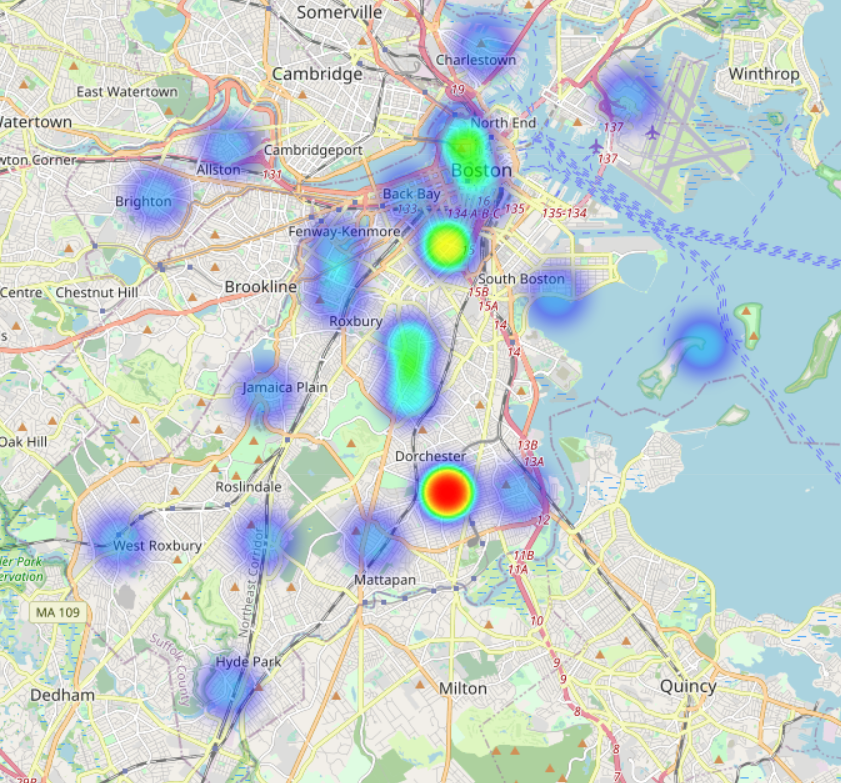

In [ ]:
df_snap.head()
df_tafdc.head()
df_eaedc.head()

CYCLE_MONTH AU_PGM_CD    CITY MEMB_STAT_CD ZIP_CODE   COUNTY  CASES  \
43  2022-12-01     EAEDC  BOSTON       ACTIVE    02124  SUFFOLK  469.0   
17  2022-12-01     EAEDC  BOSTON       ACTIVE    02118  SUFFOLK  366.0   
22  2022-12-01     EAEDC  BOSTON       ACTIVE    02119  SUFFOLK  299.0   
32  2022-12-01     EAEDC  BOSTON       ACTIVE    02121  SUFFOLK  276.0   
49  2022-12-01     EAEDC  BOSTON       ACTIVE    02125  SUFFOLK  260.0   

    CLIENTS                   Community    Lat   Long  \
43    470.0  Dorchester / Codman Square  42.29 -71.07   
17    366.0                   South End  42.34 -71.07   
22    301.0                     Roxbury  42.32 -71.08   
32    277.0        Roxbury / Grove Hall  42.31 -71.08   
49    263.0  Dorchester / Uphams Corner  42.32 -71.00   

                    Neighborhood  
43          Codman Sq|Dorchester  
17                     South End  
22       Washington Park|Roxbury  
32  Franklin Field North|Roxbury  
49                Harbor Islands

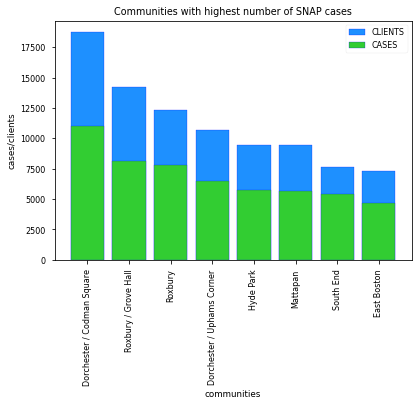

In [ ]:
df4 = df_snap.head(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='dodgerblue',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='limegreen',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of SNAP cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()


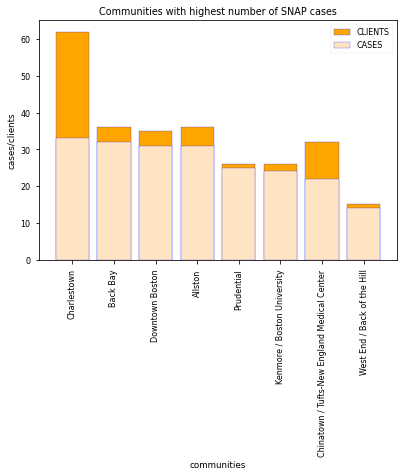

In [ ]:
df4 = df_snap.tail(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='orange',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='bisque',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of SNAP cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()

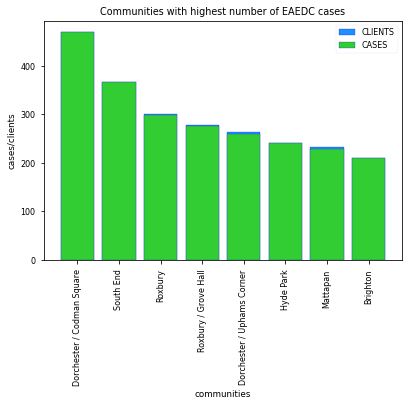

In [ ]:
df4 = df_eaedc.head(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='dodgerblue',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='limegreen',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of EAEDC cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()


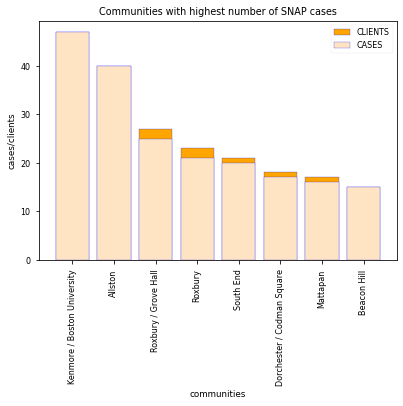

In [ ]:
df4 = df_eaedc.tail(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='orange',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='bisque',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of SNAP cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()

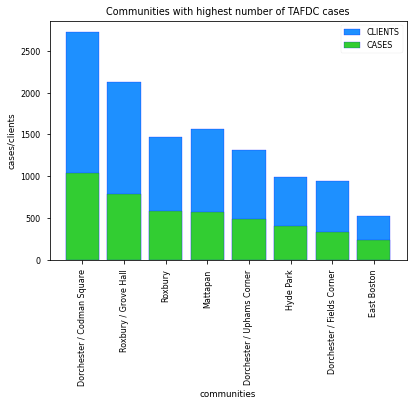

In [ ]:
df4 = df_tafdc.head(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='dodgerblue',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='limegreen',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of TAFDC cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()


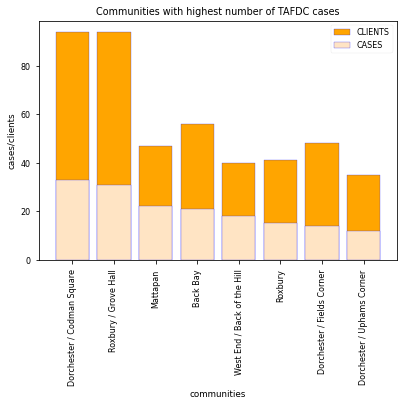

In [ ]:
df4 = df_tafdc.tail(8)

plt.xticks(rotation='vertical')
plt.bar(df4['Community'], df4['CLIENTS'], color='orange',  edgecolor='blue',label='CLIENTS')
plt.bar(df4['Community'], df4['CASES'], color='bisque',  edgecolor='blue',label='CASES')

colors = {'CASES':'green', 'CLIENTS':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Communities with highest number of TAFDC cases')
plt.xlabel('communities')
plt.ylabel('cases/clients')
plt.legend()
plt.show()

  SHORTNAME  FID    WHITE   BLACK   AIAN    ASIAN   HPI   OTHER  Shape__Area
1        D2  2.0  53120.0  4520.0  269.0  13604.0  55.0  4893.0     0.001969
[1.0 44656.0 3637.0 783.0 5080.0 50.0 20935.0 0.0029850570322196]
[2.0 53120.0 4520.0 269.0 13604.0 55.0 4893.0 0.001968731256511]
[3.0 29284.0 14990.0 492.0 13190.0 45.0 9927.0 0.0110066903946517]
[4.0 10515.0 40030.0 653.0 3093.0 44.0 11569.0 0.0013236215525012]
[5.0 20392.0 35584.0 475.0 2022.0 42.0 12727.0 0.0022998905149052]
[6.0 48416.0 8694.0 516.0 7271.0 47.0 9359.0 0.0027128071353672]
[7.0 18740.0 28006.0 519.0 6565.0 60.0 12825.0 0.0009894554646052]
[8.0 47430.0 5493.0 332.0 16405.0 54.0 5626.0 0.000802711510687]
[9.0 45548.0 4457.0 486.0 15390.0 71.0 7577.0 0.0012630510964299]


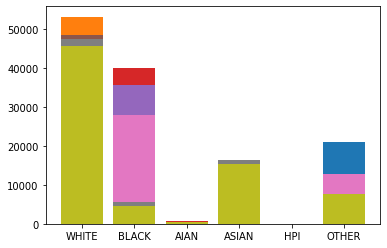

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']


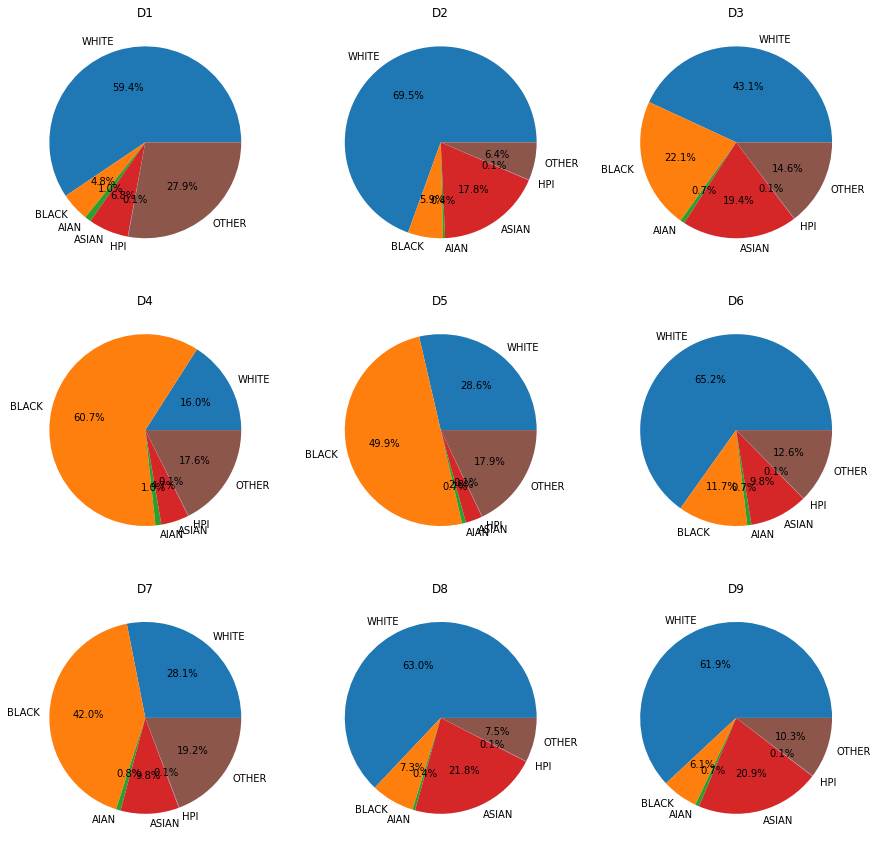

In [ ]:
name = "DTA_ZIPCODE_Report_DEC_2022.v2.xlsx - Reported Month Caseload Data .csv"
supplyWZipcode = pd.read_csv(dataPath + name)
filtered = supplyWZipcode.loc[supplyWZipcode["CITY"] == "BOSTON", ["AU_PGM_CD", "ZIP_CODE","CASES","CLIENTS"]]
# filtered["ZIP_CODE"] = filtered["ZIP_CODE"].astype(int) 
filtered["CASES"] = filtered["CASES"].fillna('0')
filtered["CASES"] = [(lambda x: int("".join(x.split(","))))(i) for i in filtered["CASES"]]
filtered["CLIENTS"] = filtered["CLIENTS"].fillna('0')
filtered["CLIENTS"] = [(lambda x: int("".join(x.split(","))))(i) for i in filtered["CLIENTS"]]
filtered

AU_PGM_CD  ZIP_CODE  CASES  CLIENTS
46       EAEDC      2108     15       15
47       EAEDC      2109      0        0
48       EAEDC      2110      0        0
49       EAEDC      2111     62       62
50       EAEDC      2113      0        0
...        ...       ...    ...      ...
2480     TAFDC      2130      0        0
2481     TAFDC      2131      0       16
2482     TAFDC      2132      0        0
2483     TAFDC      2135      0       13
2484     TAFDC      2136      0       29

[160 rows x 4 columns]

<ipython-input-4-b33eb8e96a31>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casesForZipcode = filtered.groupby("ZIP_CODE")["CASES","CLIENTS"]


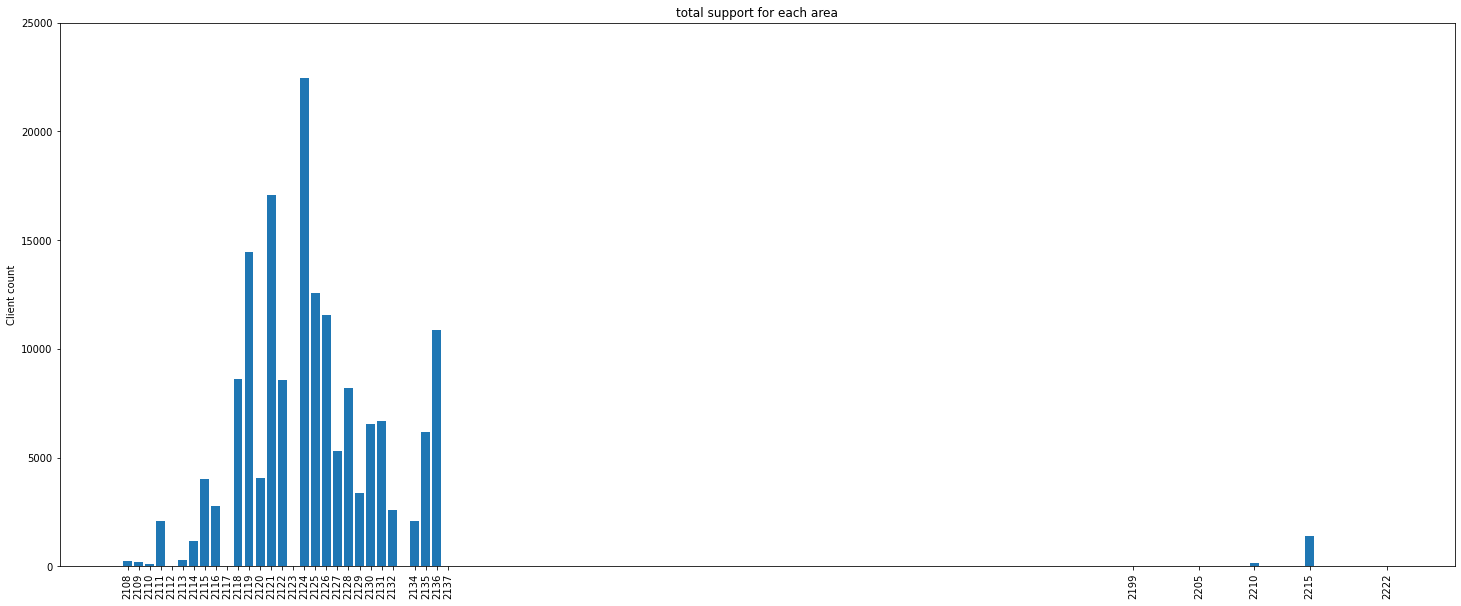

In [ ]:
import matplotlib.pyplot as plt
def printer_func(x):
    print(x)
    return x
# print(filtered.groupby("ZIP_CODE").apply(printer_func))


casesForZipcode = filtered.groupby("ZIP_CODE")["CASES","CLIENTS"]
fig, ax1 = plt.subplots()
fig.set_size_inches(25,10)

labels = list(casesForZipcode.groups.keys())
ax1.bar(labels,casesForZipcode.sum()["CLIENTS"])
ax1.set_xticks(labels)
ax1.set_xticklabels(labels= labels ,rotation = 90)
ax1.set_ylim(0,25000)
ax1.set_title("total support for each area")
ax1.set_ylabel("Client count")



plt.show()
casesForZipcode

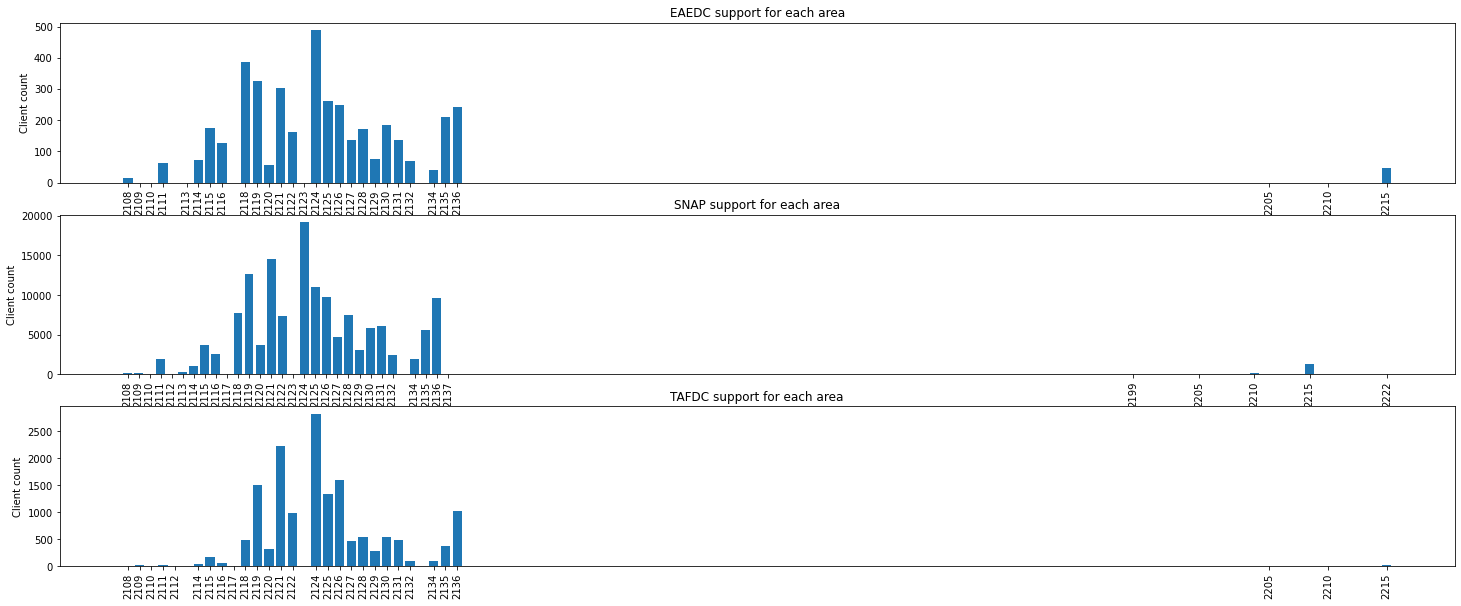

In [ ]:
EAEDC_data = filtered.loc[filtered["AU_PGM_CD"]=="EAEDC", ["ZIP_CODE","CLIENTS"]]
SNAP_data = filtered.loc[filtered["AU_PGM_CD"]=="SNAP",["ZIP_CODE","CLIENTS"]]
TAFDC_data = filtered.loc[filtered["AU_PGM_CD"]=="TAFDC",["ZIP_CODE","CLIENTS"]]

EAEDC_data = EAEDC_data.groupby("ZIP_CODE")["CLIENTS"]
EAEDC_labels = list(EAEDC_data.groups.keys())

SNAP_data = SNAP_data.groupby("ZIP_CODE")["CLIENTS"]
SNAP_labels = list(SNAP_data.groups.keys())

TAFDC_data = TAFDC_data.groupby("ZIP_CODE")["CLIENTS"]
TAFDC_labels = list(TAFDC_data.groups.keys())

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(25,10)

ax1.bar(EAEDC_labels,EAEDC_data.sum())
ax1.set_xticks(EAEDC_labels)
ax1.set_xticklabels(labels= EAEDC_labels ,rotation = 90)
ax1.set_title("EAEDC support for each area")
ax1.set_ylabel("Client count")

ax2.bar(SNAP_labels,SNAP_data.sum())
ax2.set_xticks(SNAP_labels)
ax2.set_xticklabels(labels= SNAP_labels ,rotation = 90)
ax2.set_title("SNAP support for each area")
ax2.set_ylabel("Client count")


ax3.bar(TAFDC_labels,TAFDC_data.sum())
ax3.set_xticks(TAFDC_labels)
ax3.set_xticklabels(labels= TAFDC_labels ,rotation = 90)
ax3.set_title("TAFDC support for each area")
ax3.set_ylabel("Client count")




plt.show()